In [5]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, quad_func, misctools, tools_lens, tools_delens, tools_multitracer
from matplotlib.pyplot import *

In [25]:
snmin, snmax = 1, 10
ntype = 'goal_roll50'
ntype = 'base_roll50'
#ntype = 'base_iso_roll50'
olmax = 1024
#klist = ['ALLid']
klist = ['TT','TE','EE','EB']
klist = ['comb']
kfltr = 'none'
#kfltr = 'cinv'
pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype)

In [26]:
rho, bb = {}, {}
d = prjlib.data_directory()
p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype)
qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
dobj = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr=kfltr,elmin=50)
Wsa, __ = prjlib.window('sa',512)
#Wla, __ = prjlib.window('la',ascale=0.)
#Wsa *= hp.pixelfunc.ud_grade(Wla,512)
#wnsa = np.mean(Wsa)
pid = prjlib.analysis_init(t='id',ntype='cv',snmin=snmin,snmax=snmax)

{'TT': 0, 'TE': 1, 'EE': 2, 'EB': 3, 'g0': 4, 'g1': 5, 'g2': 6, 'g3': 7, 'g4': 8, 'g5': 9, 'cib': 10}
SAT mask is further multiplied by hit-count binary


In [33]:
dalm = pickle.load(open(dobj.falm['comb'][1],"rb"))[:olmax+1,:olmax+1]
dmap = curvedsky.utils.hp_alm2map(512,olmax,olmax,dalm)

In [35]:
#wdlm = curvedsky.utils.mulwin_spin(nside,olmax,olmax,2,0*dalm,dalm,W)[1]
Balm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:olmax+1,:olmax+1]
Bmap = curvedsky.utils.hp_alm2map(512,olmax,olmax,Balm)
#wBlm = curvedsky.utils.mulwin_spin(nside,olmax,olmax,2,0*Balm,Balm,W)[1]

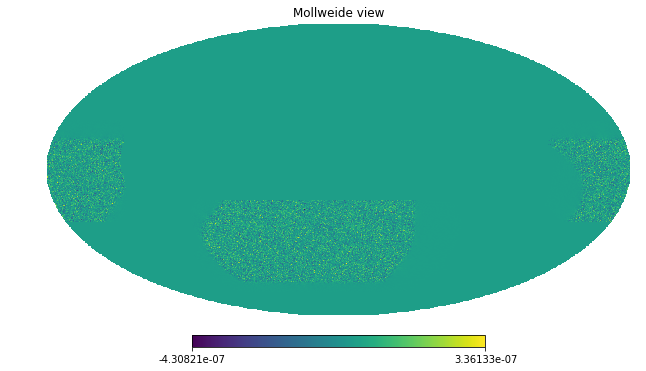

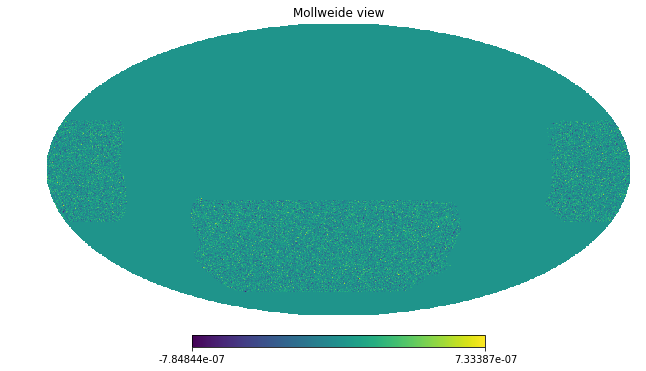

In [37]:
hp.mollview(Wsa*dmap)
hp.mollview(Wsa*Bmap)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


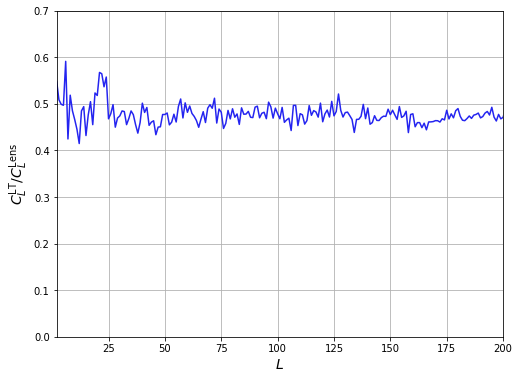

In [27]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.7,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for k in klist:
    r = 0.
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj.cl[k][i],unpack=True)
        r += BT**2/BB/TT
    plot(1-r/(snmax-snmin+1))
    #savefig('fig_each_'+fltr+'_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+pE.stag+'.png')

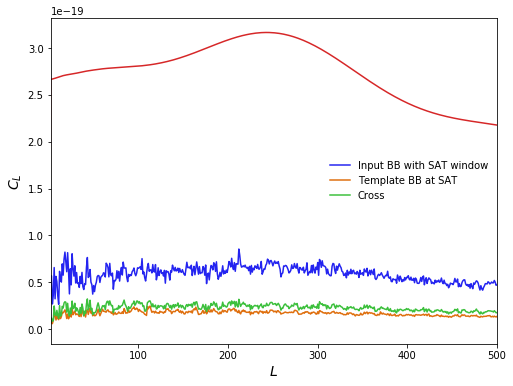

In [28]:
# BB spec
wnsa = 1.
pl.plot_1dstyle(xmin=2,xmax=500)
BB, TT, BT = np.loadtxt(dobj.cl['comb'][1],unpack=True)
plot(BB/wnsa,label='Input BB with SAT window')
plot(TT/wnsa,label='Template BB at SAT')
plot(BT/wnsa,label='Cross')
plot(p.lcl[2])
legend()
#savefig('fig_example.png')

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


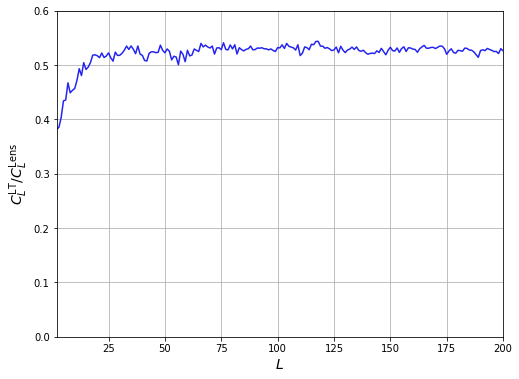

In [29]:
pl.plot_1dstyle(fsize=[8,6],xmin=2,xmax=200,ymin=.0,ymax=.6,grid=True,ylab=r'$C_L^{\rm LT}/C_L^{\rm Lens}$')
for fltr in types:
    bb, rho = np.loadtxt(dobj.frho,unpack=True,usecols=(1,2))
    #plot(rho[fltr]/bb[fltr])
    plot(rho/bb)
    #savefig('fig_wopt_'+fltr+'_'+ntype+'_k'+kfltr+'_'+p.stag+qobj.ltag+'_'+pE.stag+'.png')